In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics


In [2]:
DF = pd.read_csv("downloads/dataset_mushrooms.csv")
pd.set_option('display.max_columns', None)
DF[:5]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
print(DF.columns)
print(len(DF.columns))

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
23


In [4]:
Sub = pd.read_csv("downloads/submission_mushrooms.csv")
Sub[:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,y,y,f,f,f,c,b,h,e,b,k,k,n,b,p,w,o,l,h,v,d
1,b,s,y,t,l,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,x,f,n,t,n,f,c,b,u,t,b,s,s,p,w,p,w,o,p,n,y,d
3,k,s,n,f,y,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,p
4,f,s,e,f,f,f,c,n,b,t,?,k,k,w,p,p,w,o,e,w,v,d


In [5]:
Y = np.array([1 if x=="p" else 0 for x in DF["class"]])
print(Y)
np.unique(Y)

[1 0 0 ... 0 1 0]


array([0, 1])

In [6]:
X = DF.drop(["class"], axis = 1)
X.shape

(7921, 22)

In [7]:
Merged = X.append(Sub)
Merged.shape

(8124, 22)

In [8]:
Merged_dropped = Merged.drop(columns=["veil-type"])
Merged_dropped.shape

(8124, 21)

In [9]:
Merged_dropped["stalk-root"] = Merged_dropped["stalk-root"].str.replace("?","b")
print(Merged_dropped.shape)
print(np.unique(Merged_dropped["stalk-root"]))

(8124, 21)
['b' 'c' 'e' 'r']


In [10]:
Merged_dummies = pd.get_dummies(Merged_dropped)
print(Merged_dummies.shape)
print(np.unique(Merged_dummies))

(8124, 115)
[0 1]


In [11]:
Sub_processed = Merged_dummies[7921:]
print("Length =",len(Sub_processed), "shape =",Sub_processed.shape)
X_processed = Merged_dummies[0:7921]
print("Length =",len(X_processed), "shape =",Sub_processed.shape)

Length = 203 shape = (203, 115)
Length = 7921 shape = (203, 115)


[1.0]
[0.9994952044422009]


Text(0.5, 1.0, 'Poisonous Shroom Indicator')

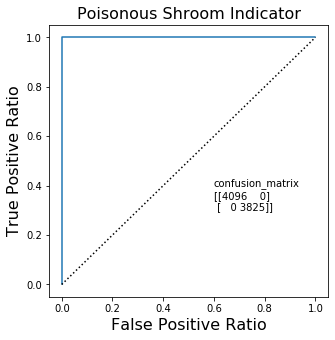

In [90]:
model=LR()
acc_1=[]
auc_1= []

X2 = np.array(X_processed)
xtrain,xtest,ytrain,ytest=train_test_split(X2,Y)
model.fit(xtrain,ytrain)
yp=model.predict(xtest)
probabilities=model.predict_proba(xtest) [:,1]
FPR,TPR,Threshold = roc_curve(ytest,probabilities)

plot1= plt.plot(FPR,TPR)

acc_1.append(accuracy_score(ytest,yp))
auc_1.append(metrics.auc(FPR,TPR))


print(auc_1)
print(acc_1)

plt.annotate("confusion_matrix\n" + str(confusion_matrix(Y,yp2)), xy = (.6,.3), 
                xytext =(.6, .3),)  



plt.gcf().set_size_inches(5,5)
plt.plot([0,1],[0,1],c = "k", ls=":")
plt.xlabel("False Positive Ratio",fontsize=16)
plt.ylabel("True Positive Ratio",fontsize=16)
plt.title("Poisonous Shroom Indicator",fontsize=16)

In [16]:
len(Y)

7921

In [17]:
len(yp)

1981

In [19]:
yp2=model.predict(X2)
con = confusion_matrix(Y,yp2)
con

array([[4096,    0],
       [   0, 3825]], dtype=int64)

In [64]:
P = np.array(Sub_processed)

yp5=model.predict(P)


h = pd.DataFrame(yp5)
h2 = h.rename({0:'Y_predicted'},axis=1)
h2

,Y_predicted
0,1
1,0
2,0
3,1
4,1
...,...
198,0
199,1
200,1
201,0


In [86]:
h2.to_csv("Group4_Mushrooms_Log-Reg_Y-predicted", index=True)

In [89]:
e_total = []
p_total = []

for value in yp5:
    if value == 1:
        p_total.append("1")
    else:
        e_total.append("0")
print("There are " + str(len(p_total)) + " poisonous mushrooms.")
print("There are " + str(len(e_total)) + " edible mushrooms.")


There are 91 poisonous mushrooms.
There are 112 edible mushrooms.
